# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Imports<a id='2.1_Imports'></a>

Placing your imports all together at the start of your notebook means you only need to consult one place to check your notebook's dependencies. By all means import something 'in situ' later on when you're experimenting, but if the imported dependency ends up being kept, you should subsequently move the import statement here with the rest.

In [38]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from library.sb_utils import save_file


## 2.2 Objectives<a id='2.2_Objectives'></a>

There are some fundamental questions to resolve in this notebook before you move on.

* Do you think you may have the data you need to tackle the desired question?
    * Have you identified the required target value?
    * Do you have potentially useful features?
* Do you have any fundamental issues with the data?

## 2.3 Load The Hotel Booking Data<a id='2.3_Load_The_Hotel_Booking_Data'></a>

In [39]:
# the supplied CSV data file is the raw_data directory
hotel_data = pd.read_csv('../raw_data/hotel_bookings.csv')

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [40]:
#Call the info method on ski_data to see a summary of the data
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

`adr` is the price of hotel room price. 

This immediately raises the question of what quantity will you want to model? You know you want to model the ticket price, but you realise there are two kinds of ticket price!

In [41]:
hotel_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2.4 Explore The Data<a id='2.4_Explore_The_Data'></a>

### 2.4.1 Find Your Hotek Of Interest<a id='2.4.1_Find_Your_Hotel_Of_Interest'></a>

Your resort of interest is called Hotel A. Check it's in the data:

In [42]:
#Hint: you will find that the transpose of the row will give a nicer output. DataFrame's do have a
#transpose method, but you can access this conveniently with the `T` property.
hotel_data[hotel_data.adr == 157.1].T

,187
hotel,Resort Hotel
is_canceled,0
lead_time,33
arrival_date_year,2015
arrival_date_month,July
arrival_date_week_number,28
arrival_date_day_of_month,6
stays_in_weekend_nights,3
stays_in_week_nights,7
adults,2


It's good that your resort doesn't appear to have any missing values.

### 2.4.2 Number Of Missing Values By Column<a id='2.4.2_Number_Of_Missing_Values_By_Column'></a>

Count the number of missing values in each column and sort them.

In [43]:
missing = pd.concat([hotel_data.isnull().sum(), 100 * hotel_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'], ascending = False)

,count,%
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


We drop agent and company columns

In [44]:
hotel_data = hotel_data.drop(columns=['agent', 'company'])

replace 0 for missing children value

In [62]:
hotel_data = hotel_data.fillna({'children': 0})

In [67]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,49.0


Remove the rows of missing country values

In [68]:
hotel_data = hotel_data.dropna()  

In [69]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119241 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119241 non-null  object 
 1   is_canceled                     119241 non-null  int64  
 2   lead_time                       119241 non-null  int64  
 3   arrival_date_year               119241 non-null  int64  
 4   arrival_date_month              119241 non-null  object 
 5   arrival_date_week_number        119241 non-null  int64  
 6   arrival_date_day_of_month       119241 non-null  int64  
 7   stays_in_weekend_nights         119241 non-null  int64  
 8   stays_in_week_nights            119241 non-null  int64  
 9   adults                          119241 non-null  int64  
 10  children                        119241 non-null  float64
 11  babies                          119241 non-null  int64  
 12  meal            

### 2.4.3 Categorical Features<a id='2.4.3_Categorical_Features'></a>

In [70]:
#Use hotel_data's `select_dtypes` method to select columns of dtype 'object'
hotel_data.select_dtypes(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


#### 2.4.3.1 Distribution Of Hotel Price By Room Type <a id='2.4.3.1_Distribution_Of_Hotel_Price_By_Romm_type'></a>

In [71]:
# Calculate average weekday and weekend price by state and sort by the average of the two
# Hint: use the pattern dataframe.groupby(<grouping variable>)[<list of columns>].mean()
room_price_means = hotel_data.groupby(['hotel','reserved_room_type'])['adr'].mean()
room_price_means

hotel         reserved_room_type
City Hotel    A                      96.390881
              B                      90.484259
              C                      92.057692
              D                     131.640418
              E                     157.915389
              F                     189.576689
              G                     202.637842
Resort Hotel  A                      76.243044
              B                     104.666667
              C                     161.356536
              D                     103.618166
              E                     114.485054
              F                     132.761121
              G                     168.238658
              H                     188.223111
              L                     124.666667
Name: adr, dtype: float64

/var/folders/89/ydtpr5gj7ld66gz_c8t27smw0000gn/T/ipykernel_8429/3388979341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_data["adr_pp"] = hotel_data["adr"] / (hotel_data["adults"] + hotel_data["children"])


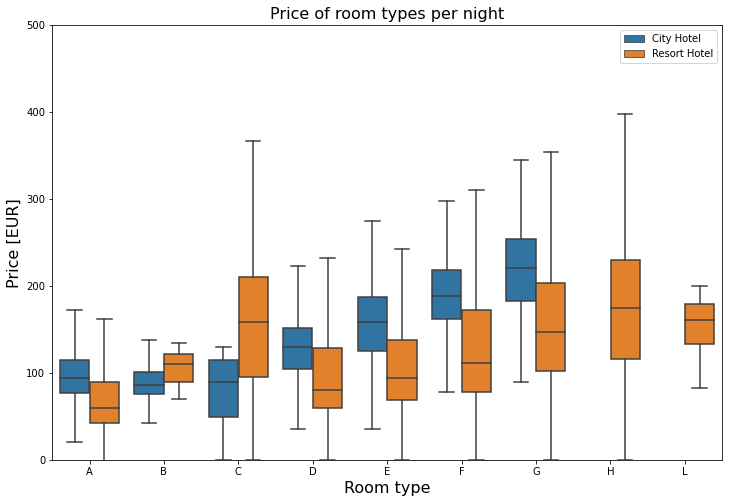

In [72]:
hotel_data["adr_pp"] = hotel_data["adr"] / (hotel_data["adults"] + hotel_data["children"])
hotel_data_guests = hotel_data.loc[hotel_data["is_canceled"] == 0] # only actual gusts
room_prices = hotel_data_guests[["hotel", "reserved_room_type", "adr"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 500)
plt.show()

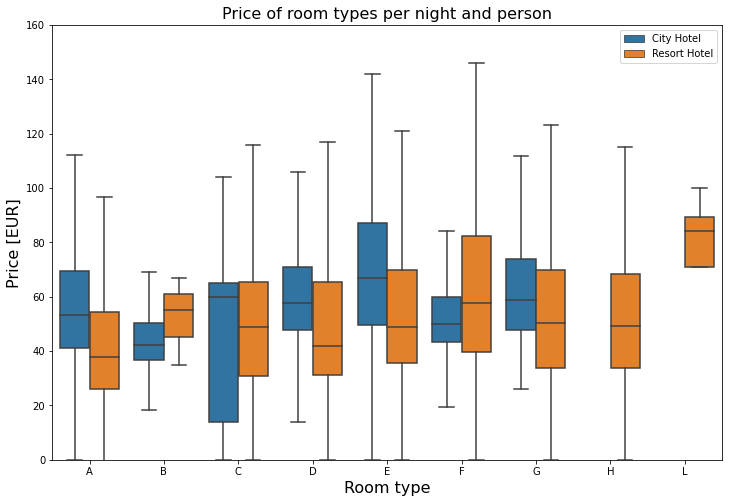

In [73]:
room_pp_prices = hotel_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_pp_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

##### 2.4.3.2 Distribution of price by year<a id='2.4.3.2_Distribution_of_price_by_year'></a>

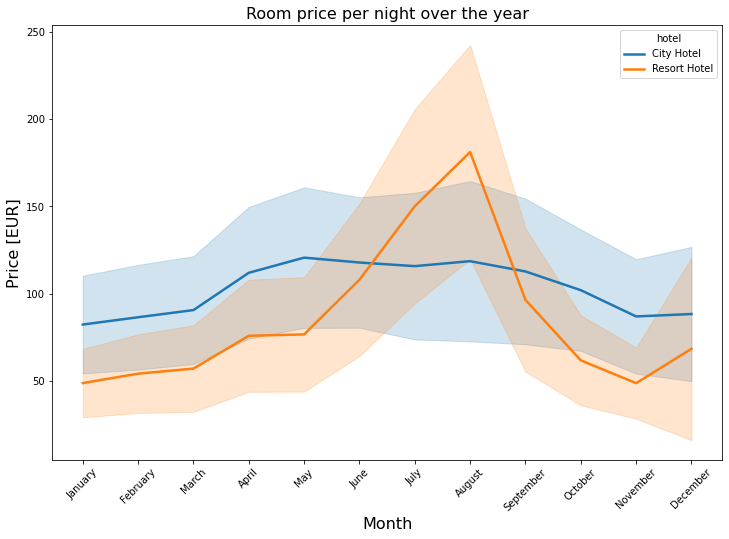

In [74]:
# grab data:
room_prices_mothly = hotel_data_guests[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

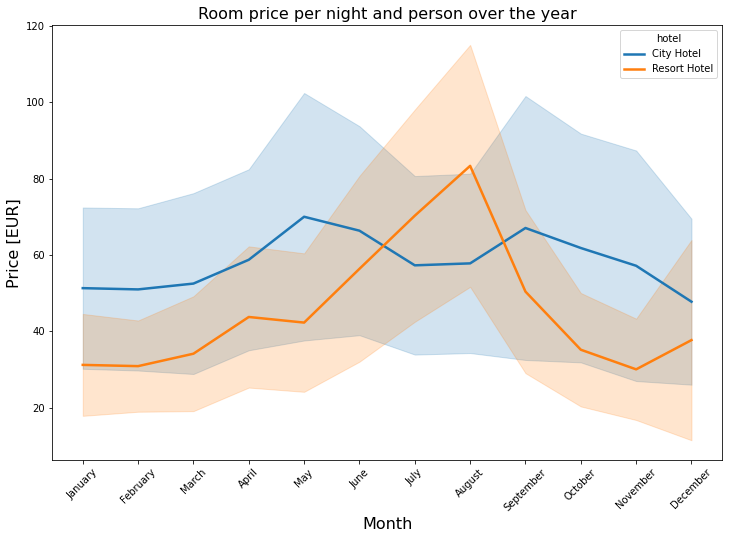

In [75]:
# grab data:
room_prices_pp_mothly = hotel_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_pp_mothly["arrival_date_month"] = pd.Categorical(room_prices_pp_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_pp_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

#### 2.4.3.3 Distribution of guests by year <a id='2.4.3.3_Distribution_of_guest_by_year'></a>

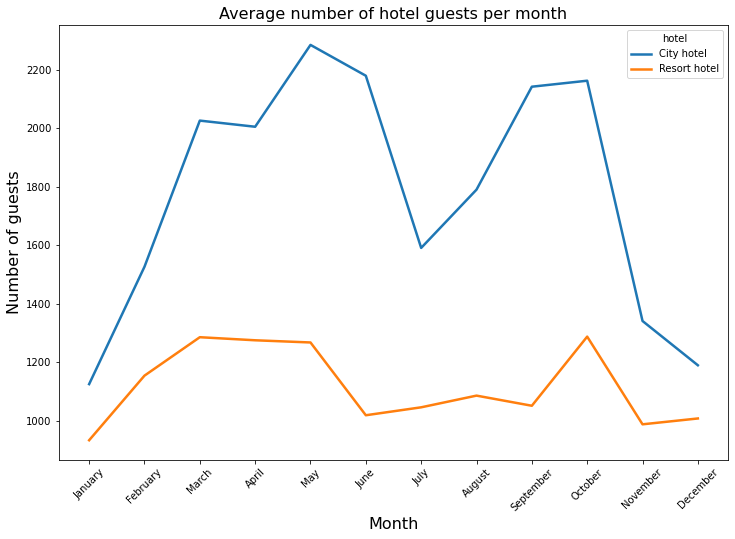

In [76]:
rh = hotel_data.loc[(hotel_data["hotel"] == "Resort Hotel") & (hotel_data["is_canceled"] == 0)]
ch = hotel_data.loc[(hotel_data["hotel"] == "City Hotel") & (hotel_data["is_canceled"] == 0)]

resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

The most busy month is April/May and September/October for city hotels as March - May and October for resort hotels.

#### 2.4.3.4 length of stay per guest <a id='2.4.3.4_lenght_of_stay_per_guest'></a>

In [77]:
# Create a DateFrame with the relevant data:
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

/var/folders/89/ydtpr5gj7ld66gz_c8t27smw0000gn/T/ipykernel_8429/2828700948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
/var/folders/89/ydtpr5gj7ld66gz_c8t27smw0000gn/T/ipykernel_8429/2828700948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]


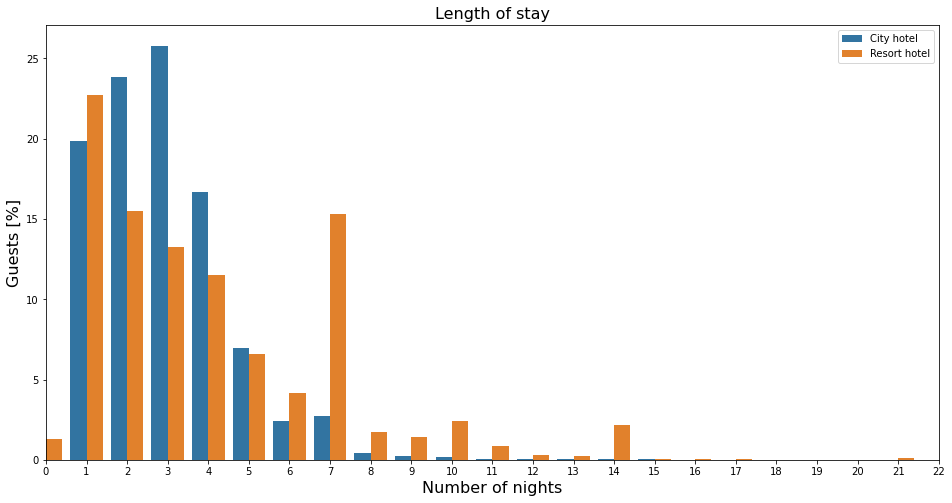

In [78]:
#show figure:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

### 2.4.4 Numeric Features<a id='2.4.4_Numeric_Features'></a>

#### 2.4.4.1 Numeric data summary<a id='2.4.4.1_Numeric_data_summary'></a>

In [79]:
hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119241.0,0.370669,0.482986,0.00,0.0,0.00,1.000000,1.0
lead_time,119241.0,104.099605,106.868921,0.00,18.0,69.00,160.000000,737.0
arrival_date_year,119241.0,2016.156507,0.707446,2015.00,2016.0,2016.00,2017.000000,2017.0
arrival_date_week_number,119241.0,27.164046,13.601731,1.00,16.0,28.00,38.000000,53.0
arrival_date_day_of_month,119241.0,15.798710,8.781202,1.00,8.0,16.00,23.000000,31.0
stays_in_weekend_nights,119241.0,0.927408,0.996285,0.00,0.0,1.00,2.000000,19.0
stays_in_week_nights,119241.0,2.499996,1.900798,0.00,1.0,2.00,3.000000,50.0
adults,119241.0,1.858723,0.575891,0.00,2.0,2.00,2.000000,55.0
children,119241.0,0.104016,0.398787,0.00,0.0,0.00,0.000000,10.0
babies,119241.0,0.007959,0.097497,0.00,0.0,0.00,0.000000,10.0


Check the adr_pp column to see why the got negtive value for the room price per person.

In [80]:
hotel_data.loc[hotel_data['adr_pp'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,-3.19


check the negtive value of room price per night

In [81]:
hotel_data.loc[hotel_data['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,-3.19


Check the infinit value of room price per night per person

In [100]:
hotel_data['adr_pp'].max()

2700.0

In [101]:
hotel_data['adr'].max() 

5400.0

In [102]:
hotel_data['adr_pp'].mean()

55.12600539943485

#### 2.4.4.2 Distributions Of Feature Values<a id='2.4.4.2_Distributions_Of_Feature_Values'></a>

Note that, although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. It's more a matter of emphasis. Here, we're interesting in focusing on whether distributions look plausible or wrong. Later on, we're more interested in relationships and patterns.

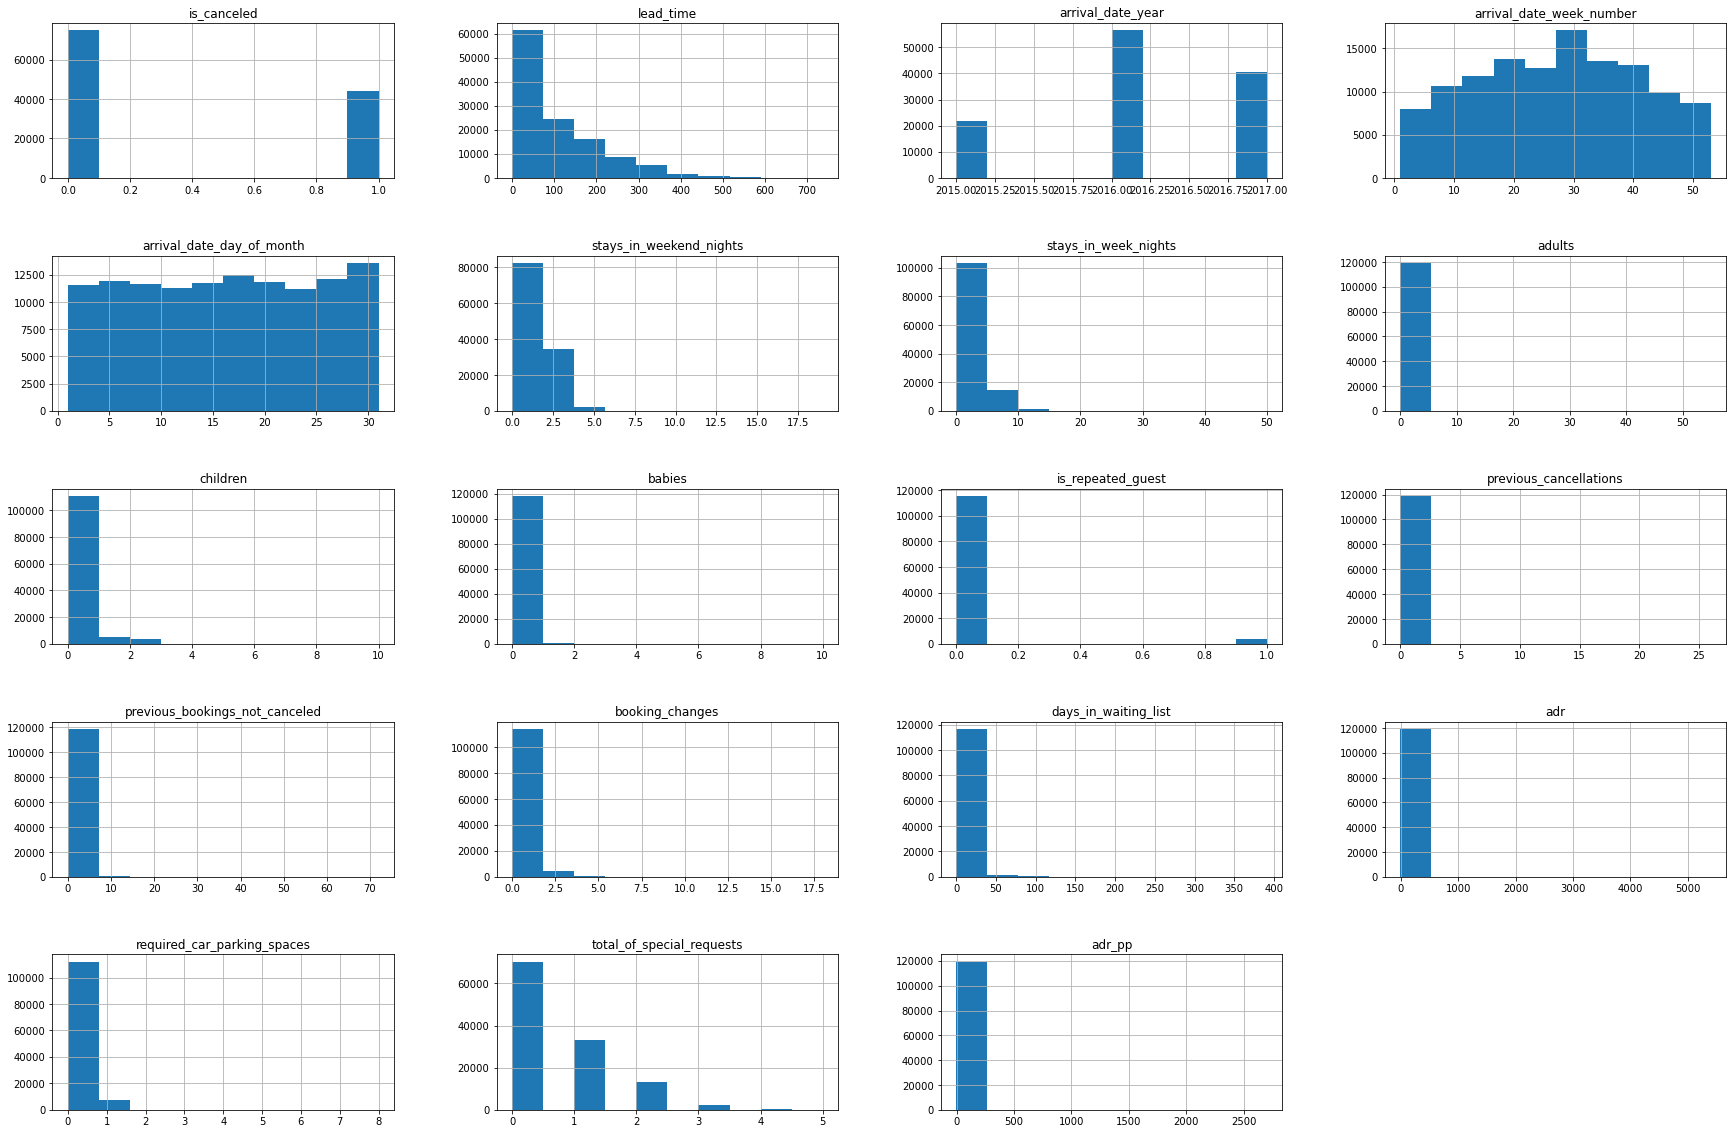

In [103]:
hotel_data.hist(figsize=(30,20))
#plt.subplots_adjust(hspace=___);
plt.subplots_adjust(hspace=0.5)
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

##### 2.1.4.2.1 weekday and weekend<a id='2.4.4.2.1_weekday and weekend'></a>

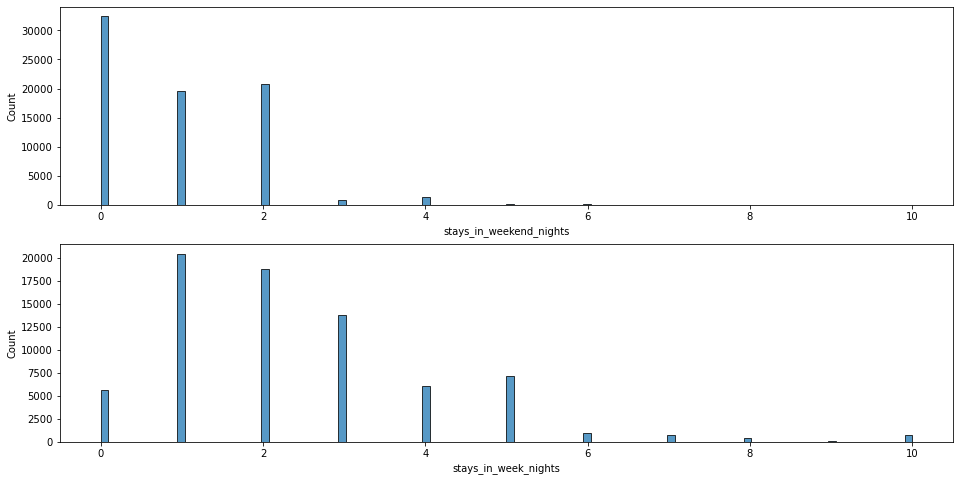

In [104]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8))

sns.histplot(data=hotel_data_guests.stays_in_weekend_nights, binrange=[0,10], ax=ax[0])
sns.histplot(data=hotel_data_guests.stays_in_week_nights, binrange=[0,10], ax=ax[1])

plt.show()

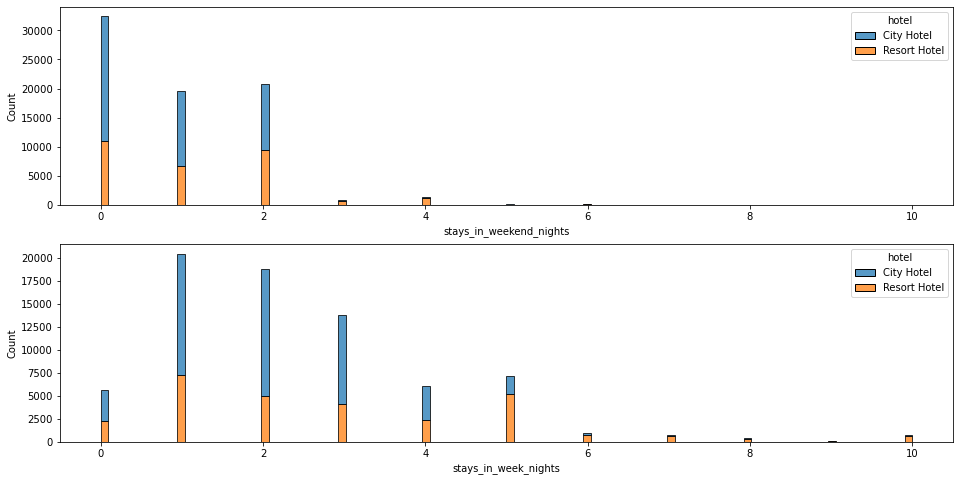

In [105]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8))
sns.histplot(data=hotel_data_guests,
             x="stays_in_weekend_nights",
             hue="hotel",
             hue_order=["City Hotel", "Resort Hotel"],
             multiple="stack",
             binrange=[0,10], ax=ax[0])


sns.histplot(data=hotel_data_guests, 
             x="stays_in_week_nights",
             hue="hotel",
             hue_order=["City Hotel", "Resort Hotel"],
             multiple="stack",
             binrange=[0,10], ax=ax[1])

plt.show()

## 2.7 Derive State-wide Summary Statistics For Our Market Segment<a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

## 2.8 Drop Rows With No Price Data<a id='2.8_Drop_Rows_With_No_Price_Data'></a>

use hotel_data_guest

## 2.9 Review distributions<a id='2.9_Review_distributions'></a>

ValueError: supplied range of [-3.19, inf] is not finite

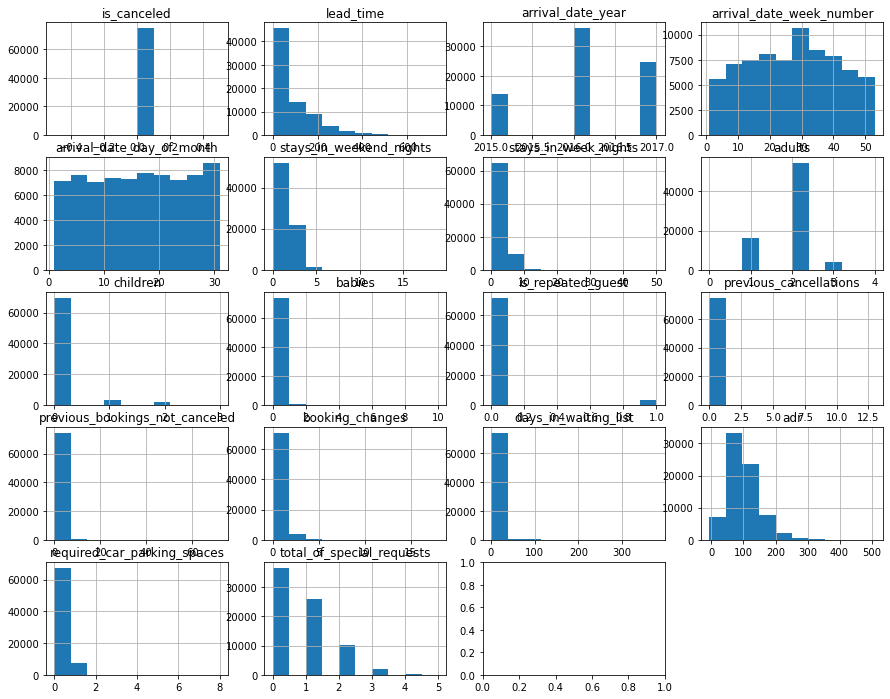

In [106]:
hotel_data_guests.hist(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5);

## 2.10 Population data<a id='2.10_Population_data'></a>

In [ ]:
#Code task 36#
#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'weekday' on the x-axis and
#'weekend' on the y-axis
hotel_data_guests.plot(x='stays_in_week_nights', y='stays_in_weekend_nights', kind='scatter');

## 2.12 Save data<a id='2.12_Save_data'></a>

In [107]:
hotel_data_guests.shape

(75042, 31)

In [108]:
hotel_data.shape

(119241, 31)

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [109]:
# save the data to a new csv file
datapath = '../data'
save_file(hotel_data, 'hotel_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/hotel_data_cleaned.csv"


In [111]:
# save the state_summary separately.
#datapath = '../data'
#save_file(state_summary, 'state_summary.csv', datapath)
save_file(hotel_data_guests, 'guests_summary.csv', datapath)

Writing file.  "../data/guests_summary.csv"


## 2.13 Summary<a id='2.13_Summary'></a>

- The main purposes of data wrangling in this case are:
  - To check out and drop the invalid elements from data;
  - To select useful information (useful columns) from the original data for the following analysis;
  - To find out and fix any other issues from original data;
  - To combine and sort data in groups according to the requirements of the following analysis.
 
 
- The key processes and findings from this note are: 
  - There are 119390 original rows and 32 colums in the data of hotel_booking.csv;
  - To check out the information of hotel A from data, and it is shown there is no missing values for our target hotel; 
  - To calculate number of missing values by column: for the key information about prices of rooms, there are no missing price; there are 94% missing of company and 0.4% missing of country, we drop the company columns, and drop the missing results of country; 
  - To check out the distribution of room price per nights by room typs, by month, by country of guests;
  - To check out the length of stays by room type, but week day and weekend;
  - To derive city hotel summary statistics for our market segment;
  - To check more details fot our target city hotel
  - So we finally get cleaned hotel data and summary data grouped by hotel type.
  
  